<h2>Linear Regression</h2>

<h3> What is Linear Regression?</h3>

Linear regression is a simple supervised statistical learning technique used for predicting quantitative a response target. Though linear regression is one of the simplest and oldest statistical learning techniques it is still very useful and widely used to this day for many reasons. 

 Throughoug this lecture we will use a portion of the `Boston Dataset` to illustrate many aspects of Linear Regresson.
 

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - CHAS     Charles River dummy variable (= Yes if tract bounds river; No otherwise)
        - RM       average number of rooms per dwelling
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - LSTAT    % lower status of the population
        
     :Target
        -Price in $10,000

In [5]:
boston=pd.read_excel('Boston_Dataset.xlsx',index_col=[0])

<h3> Multiple Linear Regression</h3>

Let $X=(X_1,\dots,X_p)$ be $p$ predictors and let $Y$ be the response variable. Assuming there is some relationship between $X$ and $Y$ we have $$Y=f(X)+\epsilon$$ where, as per usual, $\epsilon$ represents a random error. 

If we suspect that the relationship between $X$ and $Y$ is linear, then we have

$ f(X)=\beta_0+\sum_{i=1}^p\beta_iX_i=\beta_0+\beta_1X_1+\dots+\beta_pX_p $ where $\beta_0,\dots,\beta_p$ are some unknown coefficients that need to be estimated.

So, we have $$Y=\beta_0+\beta_1X_1+\dots+\beta_pX_p+\epsilon$$

<h4>Estimating Coefficients</h4>

The goal is to find estimates $\widehat{\beta}_0,\widehat{\beta}_1,\dots,\widehat{\beta}_p$, which then in turn allow us to make predictions using the formula $$\widehat{Y}=\widehat{\beta}_0+\widehat{\beta}_1X_1+\dots+\widehat{\beta}_pX_p.$$

Methods to estimate the coefficients:

<ul>
    <li>Least Squares (LS)</li>
    <li> Least Squares + $\ell^2$-regularization (Ridge Method)</li>
    <li> Least Squares + $\ell^1$-regularization (Lasso Method)</li>
</ul>

Least Squares: pick the coefficients $\widehat{\beta}_0,\widehat{\beta}_1,\dots,\widehat{\beta}_p$ such that the Residual Sum of Squares (RSS) is minimized:

$ RSS=\sum_{i=1}^n\left(y_i-\widehat{y}_i\right)^2=\sum_{i=1}^n\left(y_i-\widehat{\beta}_0-\widehat{\beta}_1x_{i1}-\dots-\widehat{\beta}_px_{ip}\right)^2$  where $n$ represents the number of samples. 

<b>Example</b>

In the case of the Boston housing data, the model would look like this:

$ \widehat{Price}=\hat{\beta_0}+\hat{\beta_1}\times (CRIM) +\hat{\beta_2}\times (CHAS) +\hat{\beta_3}\times (RM)+\hat{\beta_4}\times (DIS)+\hat{\beta_5}\times	(RAD)+\hat{\beta_6}\times (TAX)+\hat{\beta_7}\times(PTRATIO)+\hat{\beta_8}\times (LSTAT) $

The simplest form of linear regression is when $p=1$. For example, if we were trying to predict the house pricing only based on the average number of rooms per house (RM), then the model would look like this:

$ \hat{y}=\beta_0+\beta_1\times(RM)$ 

Below, is a scatterplot along with the line of best fit $\hat{y}$.

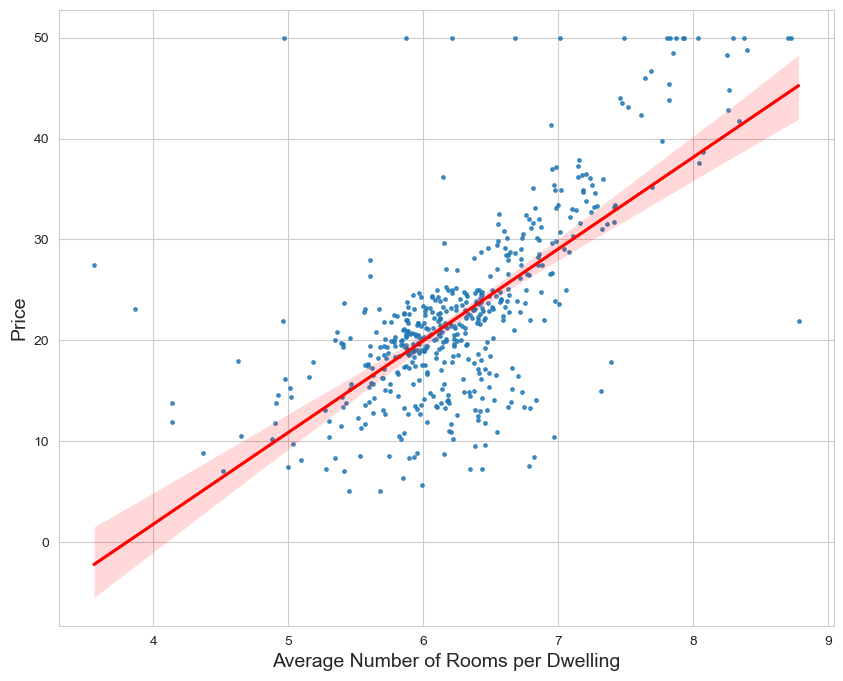

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.regplot(x='RM',y='Price',data=boston,scatter_kws={'s':6},line_kws={'color':'r'},ci=95)
plt.xlabel("Average Number of Rooms per Dwelling",fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()

<h3>Data Preprocessing</h3>

In [7]:
boston.head()

,CRIM,CHAS,RM,DIS,RAD,TAX,PTRATIO,LSTAT,Price
Unnamed: 0,,,,,,,,,
0,0.00632,No,6.575,4.0900,1,296,15.3,4.98,24.0
1,0.02731,No,6.421,4.9671,2,242,17.8,9.14,21.6
2,0.02729,No,7.185,4.9671,2,242,17.8,4.03,34.7
3,0.03237,No,6.998,6.0622,3,222,18.7,2.94,33.4
4,0.06905,No,7.147,6.0622,3,222,18.7,5.33,36.2


In [8]:
boston['CHAS'].unique()

array(['No', 'Yes'], dtype=object)

$CHAS$ is a qualitative feature we therefore dummify the variable

In [9]:
df=boston.copy()
df['CHAS']=boston['CHAS'].apply(lambda x: 1 if x=='Yes' else 0)

In [10]:
df.head()

,CRIM,CHAS,RM,DIS,RAD,TAX,PTRATIO,LSTAT,Price
Unnamed: 0,,,,,,,,,
0,0.00632,0,6.575,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0,6.421,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0,7.185,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0,6.998,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0,7.147,6.0622,3,222,18.7,5.33,36.2


Pandas also has a built-in method `pd.get_dummies()`

In [11]:
df_new=boston.copy()

In [12]:
df_new.head()

,CRIM,CHAS,RM,DIS,RAD,TAX,PTRATIO,LSTAT,Price
Unnamed: 0,,,,,,,,,
0,0.00632,No,6.575,4.0900,1,296,15.3,4.98,24.0
1,0.02731,No,6.421,4.9671,2,242,17.8,9.14,21.6
2,0.02729,No,7.185,4.9671,2,242,17.8,4.03,34.7
3,0.03237,No,6.998,6.0622,3,222,18.7,2.94,33.4
4,0.06905,No,7.147,6.0622,3,222,18.7,5.33,36.2


In [13]:
df_new=pd.get_dummies(df_new,columns=['CHAS'],drop_first=True)

In [14]:
df_new.head()

,CRIM,RM,DIS,RAD,TAX,PTRATIO,LSTAT,Price,CHAS_Yes
Unnamed: 0,,,,,,,,,
0,0.00632,6.575,4.0900,1,296,15.3,4.98,24.0,False
1,0.02731,6.421,4.9671,2,242,17.8,9.14,21.6,False
2,0.02729,7.185,4.9671,2,242,17.8,4.03,34.7,False
3,0.03237,6.998,6.0622,3,222,18.7,2.94,33.4,False
4,0.06905,7.147,6.0622,3,222,18.7,5.33,36.2,False


<Axes: >

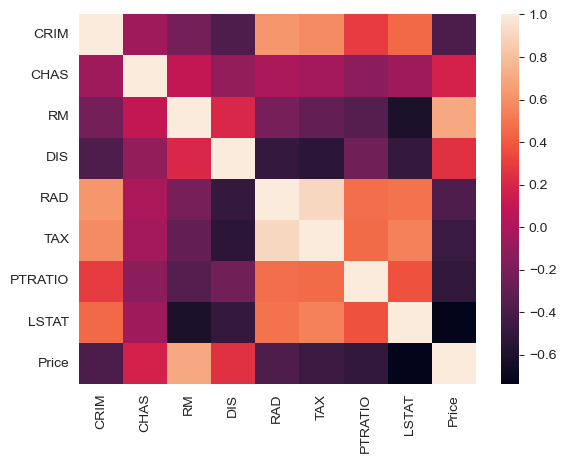

In [15]:
sns.heatmap(df.corr(numeric_only=True))

<h3> Scaling Data</h3>

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X=df.drop("Price",axis=1)
y=df['Price']

In [18]:
X.head()

,CRIM,CHAS,RM,DIS,RAD,TAX,PTRATIO,LSTAT
Unnamed: 0,,,,,,,,
0,0.00632,0,6.575,4.0900,1,296,15.3,4.98
1,0.02731,0,6.421,4.9671,2,242,17.8,9.14
2,0.02729,0,7.185,4.9671,2,242,17.8,4.03
3,0.03237,0,6.998,6.0622,3,222,18.7,2.94
4,0.06905,0,7.147,6.0622,3,222,18.7,5.33


In [19]:
y

Unnamed: 0
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [20]:
scaler=StandardScaler()
scaled=scaler.fit_transform(X)

In [21]:
X_sc=pd.DataFrame(scaled,columns=X.columns)
X_sc.head()

,CRIM,CHAS,RM,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.419782,-0.272599,0.413672,0.140214,-0.982843,-0.666608,-1.459000,-1.075562
1,-0.417339,-0.272599,0.194274,0.557160,-0.867883,-0.987329,-0.303094,-0.492439
2,-0.417342,-0.272599,1.282714,0.557160,-0.867883,-0.987329,-0.303094,-1.208727
3,-0.416750,-0.272599,1.016303,1.077737,-0.752922,-1.106115,0.113032,-1.361517
4,-0.412482,-0.272599,1.228577,1.077737,-0.752922,-1.106115,0.113032,-1.026501


<h3> Train-Test Split</h3>

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.3,random_state=12)

In [24]:
X_train.head()

,CRIM,CHAS,RM,DIS,RAD,TAX,PTRATIO,LSTAT
251,-0.395603,-0.272599,0.218494,1.712117,-0.293081,-0.464673,0.297977,-1.270404
465,-0.052359,-0.272599,-0.748850,-0.346327,1.661245,1.530926,0.806576,0.207028
137,-0.379516,-0.272599,0.241288,-0.924708,-0.637962,0.170831,1.268938,0.271508
311,-0.328535,-0.272599,-0.231698,-0.548929,-0.637962,-0.619094,-0.025677,-0.935389
406,1.990294,-0.272599,-3.058221,-1.244014,1.661245,1.530926,0.806576,1.498028


In [25]:
X_test.head()

,CRIM,CHAS,RM,DIS,RAD,TAX,PTRATIO,LSTAT
334,-0.416167,-0.272599,0.036137,1.266078,-0.523001,-1.094237,0.806576,-0.827455
394,1.134206,-0.272599,-0.566493,-0.956891,1.661245,1.530926,0.806576,0.518214
404,4.412370,-0.272599,-1.073672,-1.039938,1.661245,1.530926,0.806576,2.064330
236,-0.359936,3.668398,0.493453,0.167785,-0.178120,-0.601276,-0.488039,-0.436370
307,-0.414778,-0.272599,0.804028,-0.291089,-0.293081,-1.106115,-0.025677,-0.718119


<h3> Fitting the Model</h3>

In [26]:
from sklearn.linear_model import LinearRegression
lg=LinearRegression(copy_X=True,fit_intercept=True)
lg.fit(X_train,y_train)

LinearRegression()

In [27]:
lg.intercept_

22.55743744228266

In [28]:
lg.coef_

array([-0.86446006,  0.8612576 ,  2.69569977, -1.5013358 ,  2.01078717,
       -2.21873993, -1.60608544, -4.67802142])

In [29]:
df_coef=pd.DataFrame(lg.coef_,index=X.columns,columns=['Coefficients'])

In [30]:
df_coef.loc['Intercept','Coefficients']=lg.intercept_

In [31]:
df_coef

,Coefficients
CRIM,-0.864460
CHAS,0.861258
RM,2.695700
DIS,-1.501336
RAD,2.010787
TAX,-2.218740
PTRATIO,-1.606085
LSTAT,-4.678021
Intercept,22.557437


What do they mean?

Example: if `RM` increases by one unit, price inxcreases $2.6\times \$10,000=\$26,000$

In [32]:
lg_pred=lg.predict(X_test)

In [33]:
lg_pred

array([24.83063026, 17.47574188,  6.16661274, 30.9074152 , 30.55113446,
       21.63633596, 21.15261461, 38.96817149, 31.83124555, 26.21488955,
       24.92154567, 22.56195467, 21.39569239, 23.16380117, 33.6814428 ,
       41.50416001, 21.4960166 , 25.70784158, 25.28121928, 24.75493095,
       32.95924902, 13.22103302, 23.71382817, 15.76441438, 24.20035321,
       19.84280948, 20.96304858, 15.96664684, 26.21616831, 37.80696559,
       25.97113534, 28.14097859, 17.06149776, 32.31781983, 43.17926083,
       16.68399765, 22.12306668, 37.56745168, 17.42765716, 25.60659186,
       17.12856242, 26.54843358, 21.70548616, 32.035168  , 18.04454196,
       18.16491089, 20.73456124, 15.60151078, 37.72445609, 23.98998299,
       30.11388986, 24.30606377, 17.67463266, 25.97511877, 17.34533754,
       17.50151984, 23.67038334, 20.6182796 , 19.05006051, 19.72099212,
       20.53405976, 30.59607104, 21.08255717, 18.53894764, 22.12128823,
       25.42482489, 25.67391902, 17.08443839, 23.68767621, 39.65

In [34]:
y_test

Unnamed: 0
334    20.7
394    12.7
404     8.5
236    25.1
307    28.2
       ... 
143    15.6
354    18.2
364    21.9
370    50.0
255    20.9
Name: Price, Length: 152, dtype: float64

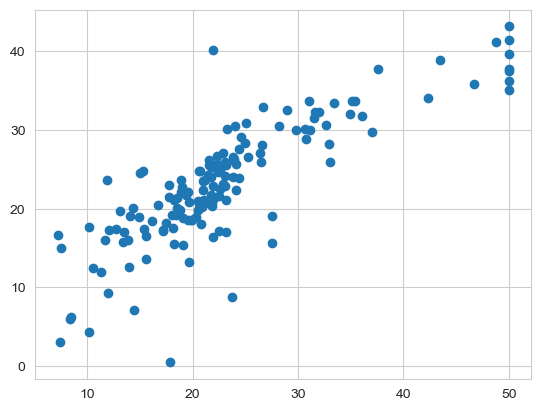

In [35]:
import matplotlib.pyplot as plt
plt.scatter(y_test,lg_pred)

From the scatterplot, since it is following a straight line, it seems that our model may be doing fairly well. 

Next, let's compute some quantitative metrics such as R2 score and MSE:

In [36]:
from sklearn.metrics import r2_score, mean_squared_error

In [37]:
lg_r2=r2_score(y_test,lg_pred)
mse=mean_squared_error(y_test,lg_pred)

In [38]:
lg_r2

0.6913263862159422

In [39]:
mse

27.079215622732818

So, looking at the R2 score, we may say that around $69\%$ of the variance in the response variable, Price, is explained by the eight measured features.

<h3> Is the relationship between the response and features linear?</h3>

One way to answer this question is by obtaining the distribution of the residuals.

<Figure size 800x600 with 0 Axes>

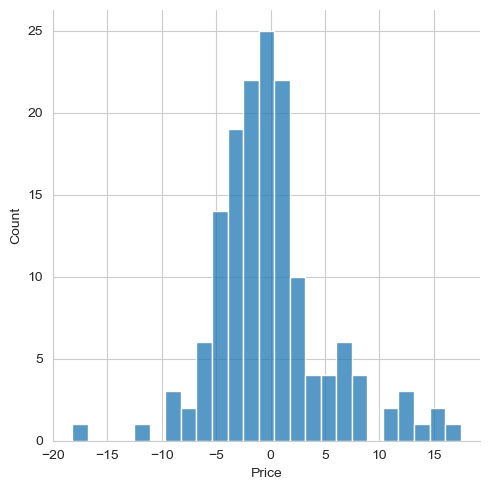

In [40]:
plt.figure(figsize=(8,6))
sns.displot((y_test-lg_pred), bins=25)

If the distribution is normal, or close to normal, then this is good empirical evidence that the relationship between the response and features is linear. Why is this?

To get a better idea of why this is the case, let's suppose we have done a superb job with our assumptions and estiamtions of $f$ and thus $\hat{f}\approx f$. Now, let's compute the residuals:

$$e_i=y_i-\hat{y_i}=f(x_i)+\epsilon_i-\hat{f}(x_i)\approx \epsilon_i$$

Recall that $\epsilon_i$ are assumed to come from a normal distribution with mean zero. Hence, we expect the distribution of the residuals to be close to a normal distribution with mean zero if indeed the relationship between the response and predictors is linear.

-----------------